<img src="../../../img/logo-bdc.png" align="right" width="64"/>

# <span style="color: #336699">Earth Observation Data Cubes for Brazil: Requirements, Methodology and Products</span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 90%;">
    Rolf E. O. Simões <sup><a href="mailto:rolf.simoes@inpe.br"><i class="far fa-lg fa-envelope"></i></a> <a href="https://orcid.org/0000-0003-0953-4132"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Alber H. Sanchez <sup><a href="mailto:alber.ipia@inpe.br"><i class="far fa-lg fa-envelope"></i></a> <a href="https://orcid.org/0000-0001-7966-2880"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Felipe M. Carlos <sup><a href="mailto:felipe.carlos@inpe.br"><i class="far fa-lg fa-envelope"></i></a> <a href="https://orcid.org/0000-0002-3334-4315"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Leonardo S. Vieira <sup><a href="mailto:leonardo.vieira@inpe.br"><i class="far fa-lg fa-envelope"></i></a> <a href="https://orcid.org/0000-0002-3397-6232"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>,<br/>
    Karine R. Ferreira <sup><a href="mailto:karine.ferreira@inpe.br"><i class="far fa-lg fa-envelope"></i></a> <a href="https://orcid.org/0000-0003-2656-5504"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Lubia Vinhas <sup><a href="mailto:lubia.vinhas@inpe.br"><i class="far fa-lg fa-envelope"></i></a> <a href="https://orcid.org/0000-0003-1104-3607"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Gilberto R. Queiroz<sup>* <a href="mailto:gilberto.queiroz@inpe.br"><i class="far fa-lg fa-envelope"></i></a> <a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    <sup>*</sup> Author to whom correspondence should be addressed.
    <br/><br/>
    February 24, 2021
</div>

<br/>

<div style="text-align: justify;  margin-left: 10%; margin-right: 10%;">
<b>Abstract.</b> This Jupyter Notebook compendium contains useful information for the creation of land use and land cover (LULC) maps using Earth observations data cubes and machine learning (ML) techniques. The code is based on the research pipeline described in the paper <em>Earth Observation Data Cubes for Brazil: Requirements, Methodology and Products</em>. All the datasets required to the reproducibility of the work is also available. 
</div>    

<br/>
<div style="text-align: justify;  margin-left: 15%; margin-right: 15%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>This Jupyter Notebook is supplement to the <a href="https://www.mdpi.com/2072-4292/12/24/4033/htm#sec5-remotesensing-12-04033" target="_blank">Section 5</a> of the following paper:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Ferreira, K.R.; Queiroz, G.R.; Vinhas, L.; Marujo, R.F.B.; Simoes, R.E.O.; Picoli, M.C.A.; Camara, G.; Cartaxo, R.; Gomes, V.C.F.; Santos, L.A.; Sanchez, A.H.; Arcanjo, J.S.; Fronza, J.G.; Noronha, C.A.; Costa, R.W.; Zaglia, M.C.; Zioti, F.; Korting, T.S.; Soares, A.R.; Chaves, M.E.D.; Fonseca, L.M.G. 2020. Earth Observation Data Cubes for Brazil: Requirements, Methodology and Products. Remote Sens. 12, no. 24: 4033. DOI: <a href="https://doi.org/10.3390/rs12244033" target="_blank">10.3390/rs12244033</a>.
    </div>
</div>

# <span style="color: #336699">Extracting time series from sample locations</span>
<hr style="border:1px solid #0077b9;">

This document describes the process of extracting time series from EO data cubes associated with LULC samples. This information is required during the creation and training of the model based on a MultiLayer Perceptron neural network described later in the notebooks related to the classification process.

In general, at this stage, as shown in the Figure 1, for each sample, a temporal spectral signature is associated considering different bands and vegetation indices. This allows each sample's labels to be linked to a specific temporal variation pattern, which is used by the algorithms for classification.

<div align="center">
  <img src="../../../img/bdc-article/land-trajectory.png" width="600px">
</div>
<br/>
<center><b>Figure 1</b> - Temporal patterns based on spectral signature.<br/><b>Source:</b> Victor Maus</center>

# <span style="color: #336699">Study Area</span>
<hr style="border:1px solid #0077b9;">

The study area is located in the Bahia state, Brazil, between the Cerrado and Caatinga biomes as depicted in Figure 1.

<div align="center">
  <img src="../../../img/bdc-article/study-area.png" width="600px">
</div>
<center><b>Figure 1</b> - Study area in relation to Brazil and its biomes.</center>

# <span style="color: #336699">The SITS R package</span>
<hr style="border:1px solid #0077b9;">


For the time series extraction process we use the [SITS R package](https://github.com/e-sensing/sits).It can be loaded with the `library` command:

In [1]:
library(sits)

SITS - satellite image time series analysis.

Loaded sits v0.9.8.
        See ?sits for help, citation("sits") for use in publication.
        See demo(package = "sits") for examples.

Using configuration file: /usr/local/lib/R/site-library/sits/extdata/config.yml

Users can provide additional configurations in ~/.sits/config.yml



The access to the Brazil Data Cube (BDC) data products requires an access key. To request your access key, please, contact the BDC team  at brazildatacube@inpe.br. The cell code below defines the access key so that it can be used by the SITS functions in order to retrieve data from the BDC services:

In [3]:
MY_ACCESS_KEY <- "My-Token"

Sys.setenv(BDC_ACCESS_KEY = MY_ACCESS_KEY)

## <span style="color: #336699">Crop Calendar</span>
<hr style="border:0.5px solid #0077b9;">

We use the region's agricultural calendar year that ranges from September 2018 to August 2019:

In [4]:
start_date  <- "2018-09-01"
end_date    <- "2019-08-31"

## <span style="color: #336699">Sample Data Points</span>
<hr style="border:0.5px solid #0077b9;">

The sample set that will be used to train the MLP model described in the manuscript contains 922 data points organized into three classes:

* Crop (242)
* Natural Vegetation (422)
* Pasture (258)

The file `training-samples.csv` in the folder `training-samples` contains the labeled data points.

In [5]:
sample_file <- url("https://brazildatacube.dpi.inpe.br/geo-knowledge-hub/bdc-article/training-samples/training-samples.csv")

As one can see, this file contains the location (`latitude`/`longitude`), a timestamp (`start_date`/`end_date`) and a label:

In [7]:
head( read.csv(sample_file) )

,id,longitude,latitude,start_date,end_date,label
,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,1,-46.197,-12.434,2018-09-01,2019-08-01,Crop
2,2,-45.666,-12.461,2018-09-01,2019-08-01,Crop
3,3,-45.893,-12.662,2018-09-01,2019-08-01,Crop
4,4,-46.194,-12.716,2018-09-01,2019-08-01,Crop
5,5,-45.968,-12.511,2018-09-01,2019-08-01,Crop
6,6,-45.968,-12.932,2018-09-01,2019-08-01,Crop


The SITS package contains some facilities to read the location of these samples and to extract the time series from data cubes. This process will result in a dataframe where each sample point is associated to time series from spectral bands and vegetation indices.

## <span style="color: #336699">Creating the Output Directory</span>
<hr style="border:0.5px solid #0077b9;">

Let's create an output folder for the datasets generated by this notebook. We are going to choose a folder named `bdc-article/training-samples` under the user home (i.e. under the `~/work`):

In [8]:
output_dir <- paste0(path.expand('~/work'), "/bdc-article", "/training-samples")

dir.create(
    path         = output_dir, 
    showWarnings = FALSE, 
    recursive    = TRUE
)

## <span style="color: #336699">Time Series Extraction</span>
<hr style="border:0.5px solid #0077b9;">

### <span style="color: #336699">CBERS-4/AWFI (16 days 'stack')</span>

The `sits_cube` function can be used to define the working data cube and the interest spectral bands and vegetation indices:

In [9]:
cb4_cube <- sits_cube(
    type        = "BDC",
    url         = "https://brazildatacube.dpi.inpe.br/stac/",
    collection  = "CB4_64_16D_STK-1",
    start_date  = start_date,
    end_date    = end_date,
    bands       = c("BAND15", "BAND14", "BAND13", "BAND16", "NDVI", "EVI")
)

In the above cell we provided the following arguments

* `type`: Inform that the data cube will be based on the Brazil Data Cube definitions.

* `url`: The SpatioTemporal Asset Catalog address for BDC data cubes. In this sandbox you can use the following address: https://brazildatacube.dpi.inpe.br/stac/.

* `collection`: Defines the use of CBERS-4/AWFI data cube.

* `start_date` and `end_date`: The temporal interval of interest.

* `bands`: The list of spectral bands and spectral indices that will be accessed.

The `sits_get_data` retries the time series from the defined data cube `cb4_cube` using the locations in the sample file:

In [10]:
cb4_samples_with_ts <- sits_get_data(cube = cb4_cube, file = sample_file)

All points have been retrieved



The structure of the returned dataframe can be seen below:

In [12]:
head(cb4_samples_with_ts, 2)

longitude,latitude,start_date,end_date,label,cube,time_series
<dbl>,<dbl>,<date>,<date>,<chr>,<chr>,<list>
-46.197,-12.434,2018-09-01,2019-08-01,Crop,bdc_cube,"17772.0000, 17788.0000, 17804.0000, 17820.0000, 17836.0000, 17852.0000, 17868.0000, 17884.0000, 17897.0000, 17913.0000, 17929.0000, 17945.0000, 17961.0000, 17977.0000, 17993.0000, 18009.0000, 18025.0000, 18041.0000, 18057.0000, 18073.0000, 18089.0000, 18105.0000, 0.0959, 0.1127, 0.0883, 0.1140, 0.0944, 0.1133, 0.0668, 0.0334, 0.0509, 0.0480, 0.0295, 0.0614, 0.0467, 0.0739, 0.0494, 0.0774, 0.0690, 0.0537, 0.0557, 0.0585, 0.0575, 0.0683, 0.1533, 0.1641, 0.1414, 0.1663, 0.1283, 0.1623, 0.1237, 0.0600, 0.0953, 0.0736, 0.0553, 0.0942, 0.0979, 0.1004, 0.0747, 0.1122, 0.1066, 0.0996, 0.0971, 0.1041, 0.1084, 0.1217, 0.2084, 0.2306, 0.2018, 0.2327, 0.1749, 0.2083, 0.1194, 0.0778, 0.0880, 0.0522, 0.0368, 0.0541, 0.0798, 0.1081, 0.0864, 0.1394, 0.1284, 0.0855, 0.0847, 0.1001, 0.0897, 0.1236, 0.3302, 0.3425, 0.3139, 0.3422, 0.2767, 0.3567, 0.4800, 0.2865, 0.4588, 0.5371, 0.5330, 0.6400, 0.3634, 0.2427, 0.1570, 0.2636, 0.2855, 0.3784, 0.4294, 0.4005, 0.4382, 0.4371, 0.1635, 0.1487, 0.1504, 0.1453, 0.1572, 0.2111, 0.5317, 0.3471, 0.5775, 0.8134, 0.8094, 0.9738, 0.4752, 0.2516, 0.1352, 0.2043, 0.2552, 0.4918, 0.5669, 0.4806, 0.5638, 0.4703, 0.2261, 0.1952, 0.2173, 0.1904, 0.2254, 0.2626, 0.6016, 0.5728, 0.6781, 0.8228, 0.8708, 0.8441, 0.6398, 0.3836, 0.2900, 0.3081, 0.3795, 0.6313, 0.6704, 0.6000, 0.6601, 0.5591"
-45.666,-12.461,2018-09-01,2019-08-01,Crop,bdc_cube,"17772.0000, 17788.0000, 17804.0000, 17820.0000, 17836.0000, 17852.0000, 17868.0000, 17884.0000, 17897.0000, 17913.0000, 17929.0000, 17945.0000, 17961.0000, 17977.0000, 17993.0000, 18009.0000, 18025.0000, 18041.0000, 18057.0000, 18073.0000, 18089.0000, 18105.0000, 0.0989, 0.1282, 0.1036, 0.1224, 0.1307, 0.1192, 0.0878, 0.0468, 0.0406, 0.0366, 0.0234, 0.0842, 0.0452, 0.0380, 0.0511, 0.0727, 0.0635, 0.0544, 0.0458, 0.0549, 0.0537, 0.0700, 0.1350, 0.1681, 0.1565, 0.1563, 0.1566, 0.1550, 0.1273, 0.0762, 0.0863, 0.0616, 0.0483, 0.1010, 0.0750, 0.0826, 0.0728, 0.1052, 0.0971, 0.0830, 0.0763, 0.0864, 0.0863, 0.1006, 0.1748, 0.2034, 0.2005, 0.1856, 0.1606, 0.1802, 0.1254, 0.0684, 0.0493, 0.0338, 0.0303, 0.0810, 0.0463, 0.0535, 0.0891, 0.1334, 0.1168, 0.0803, 0.0636, 0.0865, 0.0912, 0.1246, 0.2934, 0.3268, 0.3331, 0.2914, 0.2533, 0.3026, 0.3505, 0.2849, 0.4972, 0.5954, 0.5711, 0.3913, 0.5064, 0.4262, 0.1791, 0.2590, 0.2200, 0.2689, 0.2833, 0.2625, 0.2589, 0.2524, 0.1852, 0.1945, 0.1884, 0.1778, 0.1874, 0.2053, 0.3896, 0.4026, 0.7522, 0.9214, 0.8571, 0.6226, 0.7959, 0.6372, 0.1691, 0.2073, 0.1786, 0.3511, 0.4156, 0.3212, 0.2987, 0.2166, 0.2533, 0.2327, 0.2485, 0.2218, 0.2239, 0.2535, 0.4729, 0.6127, 0.8195, 0.8925, 0.8992, 0.6569, 0.8324, 0.7769, 0.3355, 0.3200, 0.3064, 0.5400, 0.6333, 0.5042, 0.4790, 0.3389"


If you want to plot the NDVI time series for all the LULC classes, use the following `plot` function:

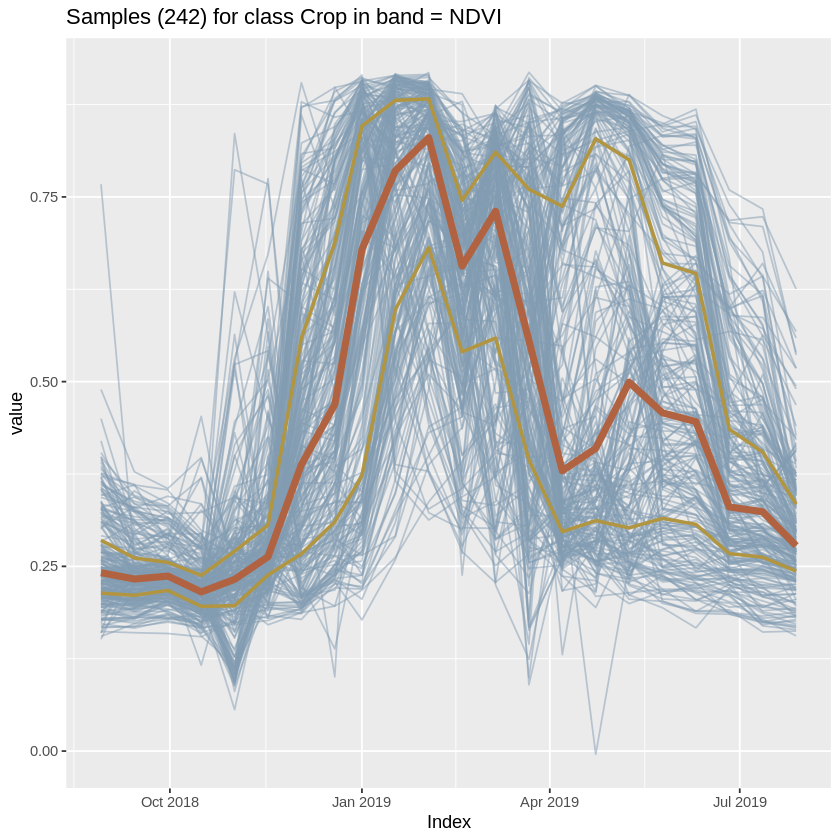

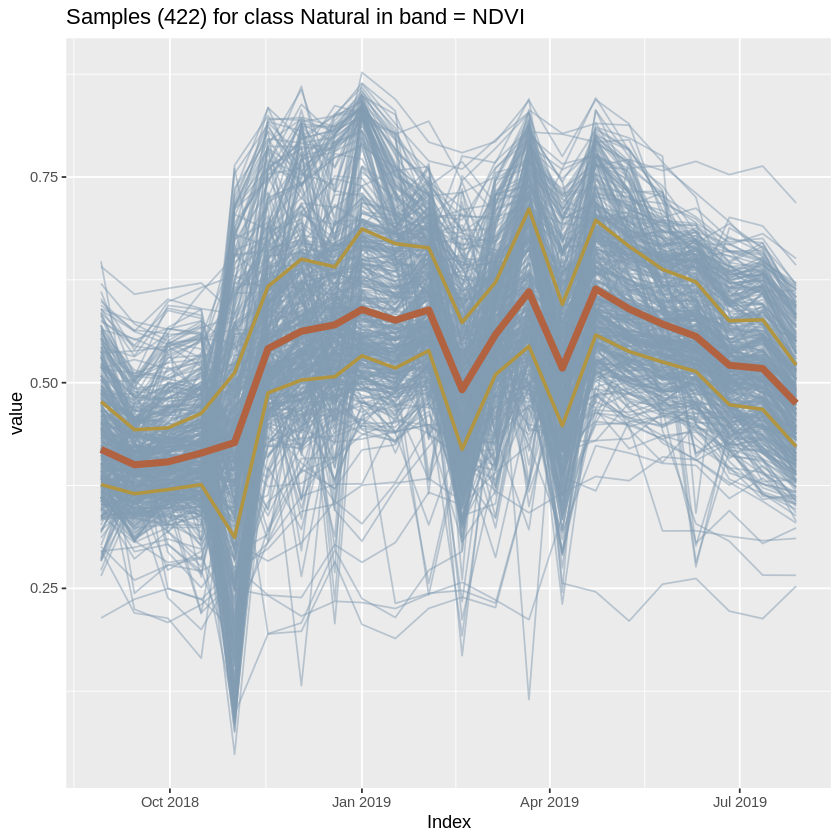

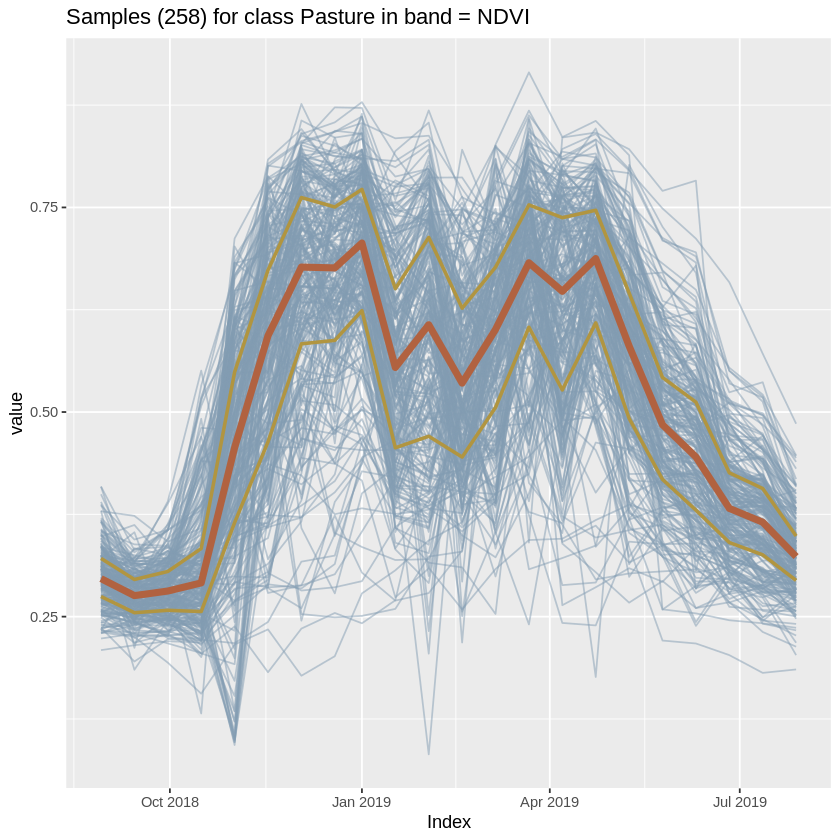

In [13]:
plot(sits_select(cb4_samples_with_ts, bands = c("NDVI")))

If you are interested only in a single class:

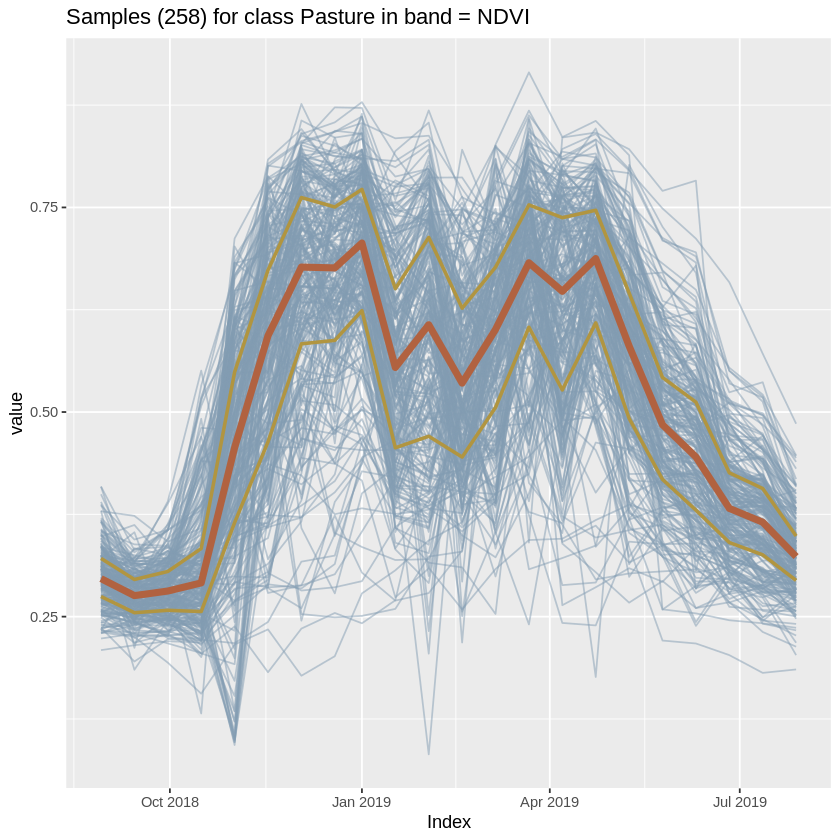

In [14]:
plot(sits_select(cb4_samples_with_ts[cb4_samples_with_ts$label == "Pasture",], bands = c("NDVI")))

Finally, let's save the dataframe with the samples and time series in a file named `CB4_64_16D_STK_1.rds`. We are going to use it later on the classification notebook.

In [15]:
saveRDS(cb4_samples_with_ts, paste0(output_dir, "/CB4_64_16D_STK_1.rds"))

### <span style="color: #336699">Landsat-8/OLI (16 days 'stack')</span>

The following code cells repeat the process described on the previous section to the Landsat-8 data cube.

In [ ]:
l8_cube <- sits_cube(
    type        = "BDC",
    name        = "bdc-l8",
    url         = "https://brazildatacube.dpi.inpe.br/stac/",
    collection  = "LC8_30_16D_STK-1",
    start_date  = start_date,
    end_date    = end_date,
    bands       = c("band4", "band3", "band2", "band5", "NDVI", "EVI")
)

In [ ]:
l8_samples_with_ts <- sits_get_data(cube = l8_cube, file = sample_file)


saveRDS(l8_samples_with_ts, paste0(output_dir, "/LC8_30_16D_STK_1.rds"))

### <span style="color: #336699">Sentinel-2/MSI (16 days 'stack')</span>

The following code cells repeat the process described on the CBERS-4/AWFI data cube section to the Sentinel-2 data cube.

In [ ]:
s2_cube <- sits_cube(
    type        = "BDC",
    name        = "bdc-s2",
    url         = "https://brazildatacube.dpi.inpe.br/stac/",
    collection  = "S2_10_16D_STK-1",
    start_date  = start_date,
    end_date    = end_date,
    bands       = c("band4", "band3", "band2", "band8", "NDVI", "EVI")
)

In [ ]:
s2_samples_with_ts <- sits_get_data(cube = s2_cube, file = sample_file)


saveRDS(s2_samples_with_ts, paste0(output_dir, "/S2_10_16D_STK_1.rds"))

# <span style="color: #336699">Final Remarks</span>
<hr style="border:1px solid #0077b9;">

* A copy of the training samples with the time series for each satellite/sensor data cube can be found in the folder `training-samples/rds`.

* If you want to download and run this notebook in a workflow as a script, you can perform its parameterization through the [papermill library](https://github.com/nteract/papermill).

* The data cubes used to extract the time series are also available on [BDC-STAC](https://brazildatacube.dpi.inpe.br/stac/).